####**To improve the efficiency of your model and reduce validation loss, consider the following suggestions:**
#**1. Data Augmentation:**
Apply random transformations (rotation, flipping, zooming) to increase dataset size and diversity.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)

model.fit(train_generator, epochs=60, validation_data=test_generator)

#**2. Transfer Learning:**
Utilize pre-trained models (e.g., VGG16, ResNet50) as feature extractors.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#**3. Batch Normalization:**
You've already applied batch normalization. Ensure **it's placed after convolutional layers.**

#**4. Regularization:**
**Increase the L2 regularization strength or add dropout layers.**

In [ ]:
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.5))

#**5. Learning Rate Scheduling:**
**Adjust the learning rate schedule or use a different optimizer (e.g., SGD with momentum).**

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

#**6. Ensemble Methods:**
Combine **multiple models** to improve overall performance.

#**7. Hyperparameter Tuning:**
Perform **grid search or random search** to optimize hyperparameters.

In [ ]:
from tensorflow.keras.tuner import HyperModel

class CIFAR100Model(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(hp.Choice('num_filters', [32, 64, 128]), (3, 3), activation='relu', input_shape=self.input_shape))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(hp.Choice('num_units', [64, 128, 256]), activation='relu'))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']), loss='categorical_crossentropy', metrics=['accuracy'])
        return model

tuner = HyperModel(CIFAR100Model((32, 32, 3), 100))
tuner.search(x_train, y_train, epochs=60, validation_data=(x_test, y_test))

****************************************************************************************************************************************************************

#**CNN-BatchNormalization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Added Dropout to the import statement
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout # Import BatchNormalization

In [ ]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
# Define class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'bicycle', 'bottles',
                'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cannon', 'castle', 'cattle',
                'church', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'frog', 'girl', 'hamster', 'house',
                'kangaroo', 'keyboard', 'lamp', 'lizard', 'lobster', 'man', 'maple_tree', 'motorbike',
                'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
                'pear', 'pickup_truck', 'pine_tree', 'plain', 'plates', 'puppy', 'rabbit', 'raccoon',
                'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'snake', 'spider', 'squirrel',
                'streetcar', 'sunflowers', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
                'willow_tree', 'wolf', 'woman', 'worm']


In [ ]:
# Plot first 9 images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    # The following line has been modified to ensure the index is within the valid range
    ax.set_title(f'{class_labels[y_train[i][0] % len(class_labels)]}')
    ax.axis('off')

plt.show()


In [ ]:
# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))


model.summary()

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

In [ ]:
# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.001
)

In [ ]:
# Train model
history = model.fit(
    x_train,
    y_train,
    epochs=60,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Test with new image
img_path = '/content/apple.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')


# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

#**CNN-ImageGenerator(DATA AUGMENTATION)**




169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


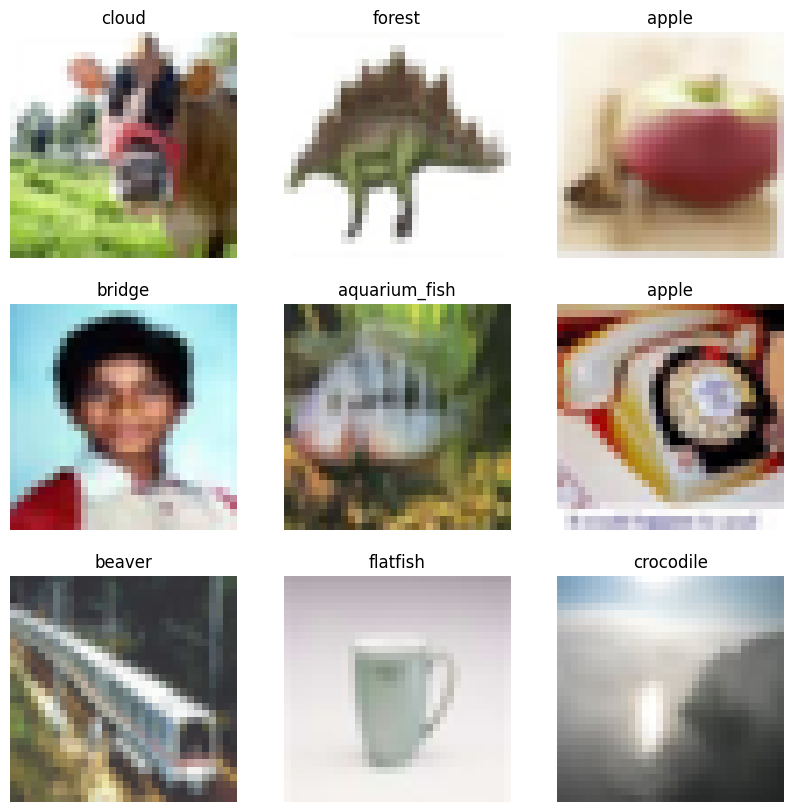

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,396 (1.08 MB)

 Trainable params: 283,396 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 110ms/step - accuracy: 0.0169 - loss: 5.2751 - val_accuracy: 0.0500 - val_loss: 4.2852 - learning_rate: 0.0010
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.0456 - loss: 4.3002 - val_accuracy: 0.0792 - val_loss: 4.1351 - learning_rate: 0.0010
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.0675 - loss: 4.1723 - val_accuracy: 0.0867 - val_loss: 4.0688 - learning_rate: 0.0010
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.0760 - loss: 4.1118 - val_accuracy: 0.0979 - val_loss: 4.0153 - learning_rate: 0.0010
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.0829 - loss: 4.0789 - val_accuracy: 0.1052 - val_loss: 3.9796 - learning_rate: 0.0010
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.0860 - loss: 4.0633 - val_accuracy: 0.1073 - val_loss: 3.9706 - learning_rate: 0.0010
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.0907 - loss: 4.036

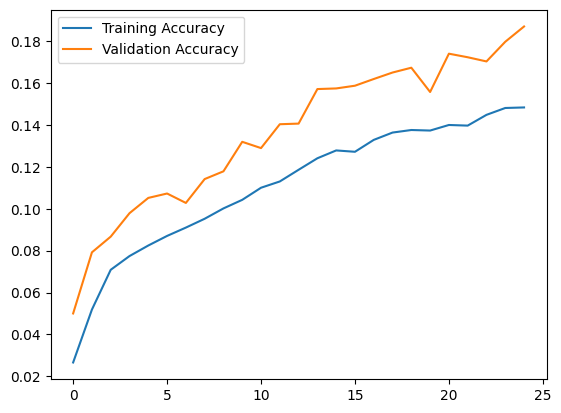

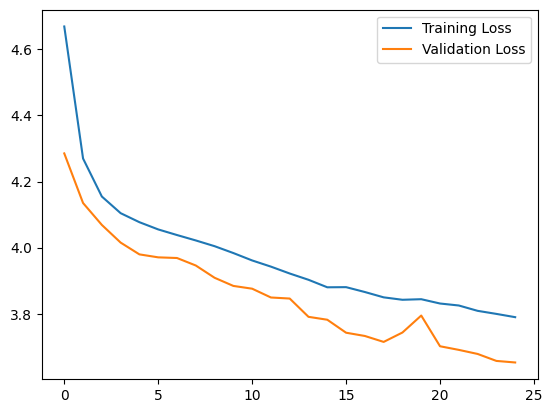

In [2]:
#Here's the rewritten code incorporating data augmentation:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Define class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'bicycle', 'bottles',
                'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cannon', 'castle', 'cattle',
                'church', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'frog', 'girl', 'hamster', 'house',
                'kangaroo', 'keyboard', 'lamp', 'lizard', 'lobster', 'man', 'maple_tree', 'motorbike',
                'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
                'pear', 'pickup_truck', 'pine_tree', 'plain', 'plates', 'puppy', 'rabbit', 'raccoon',
                'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'snake', 'spider', 'squirrel',
                'streetcar', 'sunflowers', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
                'willow_tree', 'wolf', 'woman', 'worm']

# Plot first 9 images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.set_title(f'{class_labels[y_train[i][0] % len(class_labels)]}')
    ax.axis('off')

plt.show()

# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

model.summary()

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.001
)

# Train model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Test with new image
img_path = '/content/apple.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')


# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


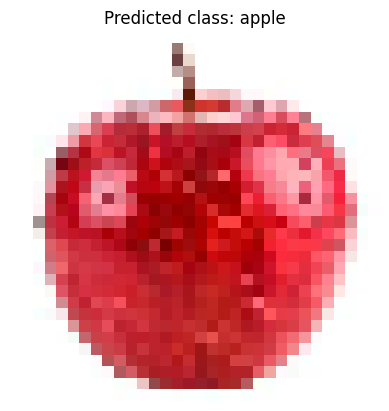

In [7]:
# Test with new image
img_path = '/content/apple.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')


# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: bowls
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


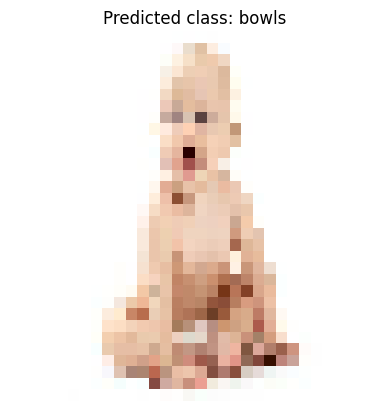

In [10]:
# Test with new image
img_path = '/content/baby2.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')

# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: cockroach
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


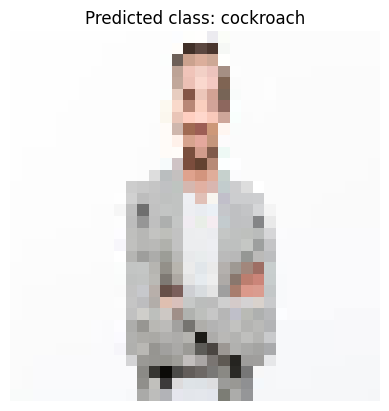

In [11]:
# Test with new image
img_path = '/content/man.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')


# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

#**CNN-TRANSFER LEARNING**

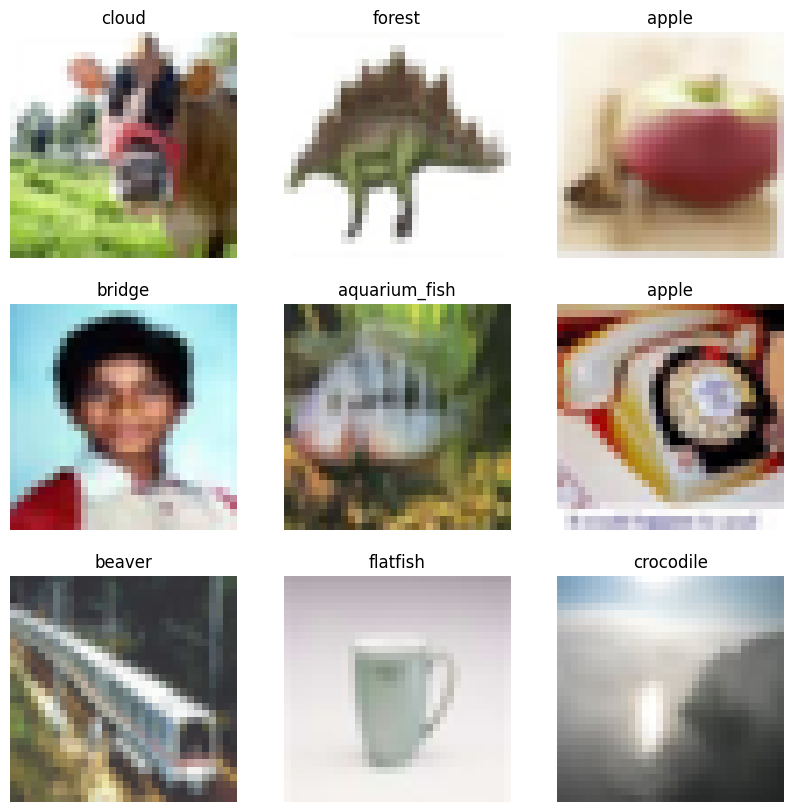

Epoch 1/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.0230 - loss: 4.6143 - val_accuracy: 0.0165 - val_loss: 5.0195 - learning_rate: 0.0010
Epoch 2/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.0337 - loss: 4.2736 - val_accuracy: 0.0180 - val_loss: 6.3344 - learning_rate: 0.0010
Epoch 3/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.0493 - loss: 4.1244 - val_accuracy: 0.0221 - val_loss: 6.2505 - learning_rate: 0.0010
Epoch 4/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.0645 - loss: 3.9404 - val_accuracy: 0.0614 - val_loss: 4.0681 - learning_rate: 0.0010
Epoch 5/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.0740 - loss: 3.8504 - val_accuracy: 0.0557 - val_loss: 4.4751 - learning_rate: 0.0010
Epoch 6/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.0850 - loss: 3.7569 - val_accuracy: 0.0556 - val_loss: 4.3016 - learning_rate: 0.0010
Epoch 7/125
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.

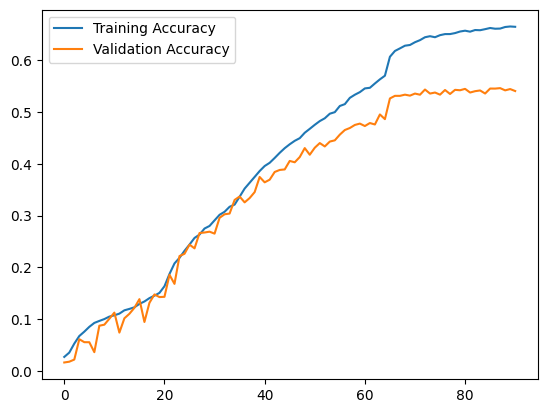

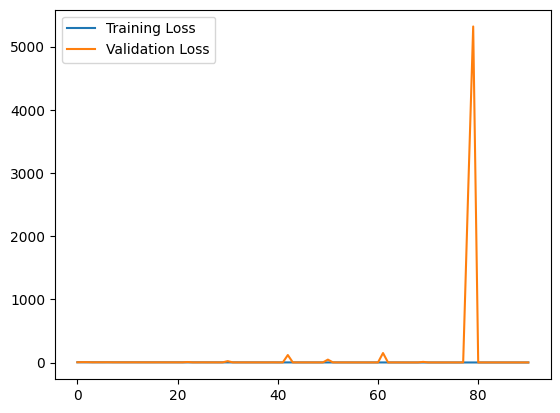

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Define class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'bicycle', 'bottles',
                'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cannon', 'castle', 'cattle',
                'church', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'frog', 'girl', 'hamster', 'house',
                'kangaroo', 'keyboard', 'lamp', 'lizard', 'lobster', 'man', 'maple_tree', 'motorbike',
                'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
                'pear', 'pickup_truck', 'pine_tree', 'plain', 'plates', 'puppy', 'rabbit', 'raccoon',
                'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'snake', 'spider', 'squirrel',
                'streetcar', 'sunflowers', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
                'willow_tree', 'wolf', 'woman', 'worm']

# Plot first 9 images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.set_title(f'{class_labels[y_train[i][0] % len(class_labels)]}')
    ax.axis('off')

plt.show()

# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)

# Transfer learning using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train model
history = model.fit(
    train_generator,
    epochs=125,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Predicted class: orange
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


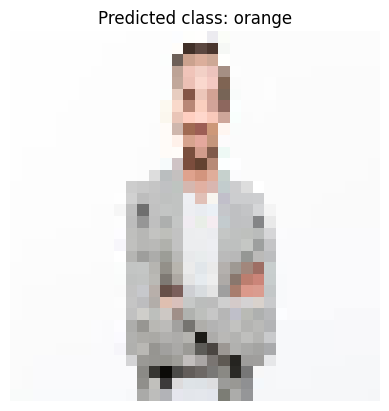

In [9]:
# Test with new image
img_path = '/content/man.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')


# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: bridge
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


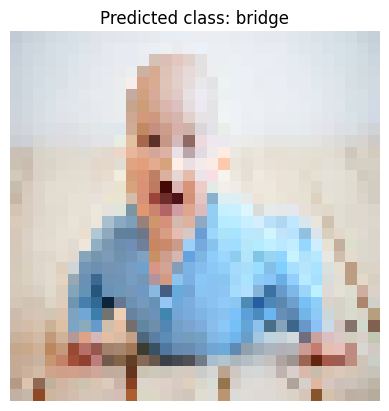

In [10]:
# Test with new image
img_path = '/content/baby.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')

# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: wolf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


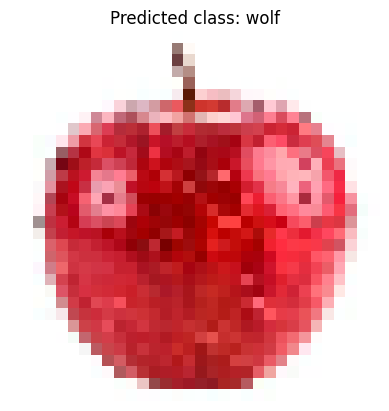

In [11]:
# Test with new image
img_path = '/content/apple.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {class_labels[predicted_class[0]]}')


# Display image with predicted class as title
import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img)
plt.title(f'Predicted class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()

#**CNN-BATCH NORMALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Define class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'bicycle', 'bottles',
                'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cannon', 'castle', 'cattle',
                'church', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'frog', 'girl', 'hamster', 'house',
                'kangaroo', 'keyboard', 'lamp', 'lizard', 'lobster', 'man', 'maple_tree', 'motorbike',
                'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
                'pear', 'pickup_truck', 'pine_tree', 'plain', 'plates', 'puppy', 'rabbit', 'raccoon',
                'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'snake', 'spider', 'squirrel',
                'streetcar', 'sunflowers', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
                'willow_tree', 'wolf', 'woman', 'worm']

# Plot first 9 images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.set_title(f'{class_labels[y_train[i][0] % len(class_labels)]}')
    ax.axis('off')

plt.show()

# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)

# Custom CNN model with Batch Normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce

#**CNN-REGULARIZATION.**

###**Regularization Techniques Used:**
1. L2 Regularization (Weight Decay): Added to convolutional and dense layers to prevent overfitting.
2. Dropout: Applied after convolutional and dense layers to randomly drop neurons during training.
3. Early Stopping: Monitors validation loss and stops training when it stops improving.
4. Learning Rate Reduction: Reduces learning rate when validation loss stops improving.

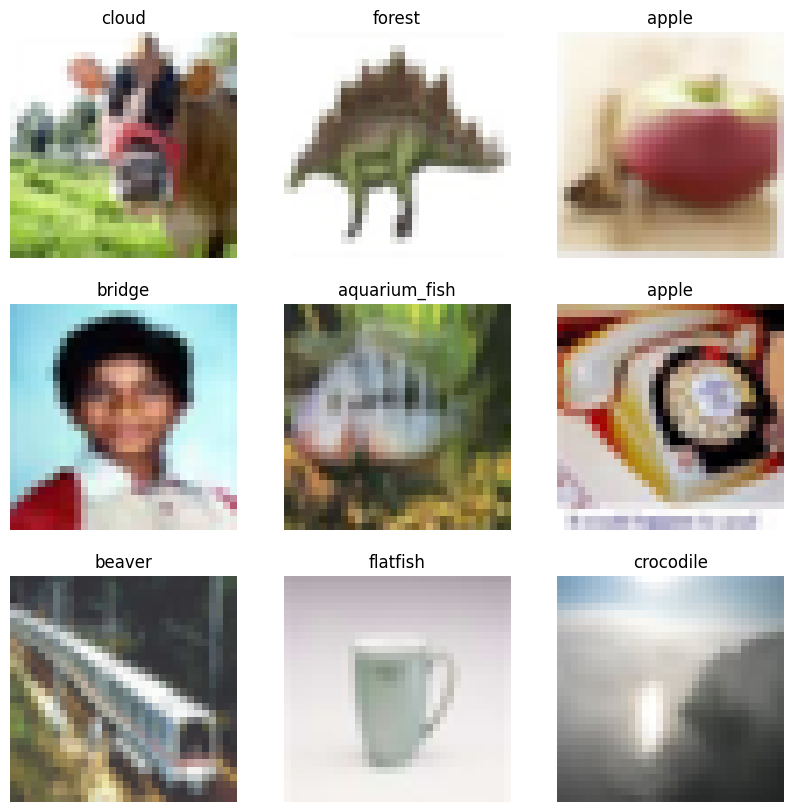

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.0721 - loss: 6.9098 - val_accuracy: 0.0298 - val_loss: 5.3693 - learning_rate: 0.0010
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1752 - loss: 4.0912 - val_accuracy: 0.1822 - val_loss: 3.8746 - learning_rate: 0.0010
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.2182 - loss: 3.6937 - val_accuracy: 0.2197 - val_loss: 3.7131 - learning_rate: 0.0010
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2446 - loss: 3.5520 - val_accuracy: 0.1950 - val_loss: 3.8062 - learning_rate: 0.0010
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2620 - loss: 3.4599 - val_accuracy: 0.2658 - val_loss: 3.4898 - learning_rate: 0.0010
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2765 - loss: 3.4026 - val_accuracy: 0.2418 - val_loss: 3.7132 - learning_rate: 0.0010
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2921 - loss: 3.355

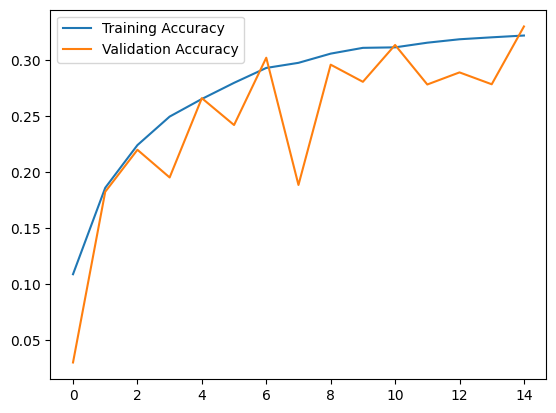

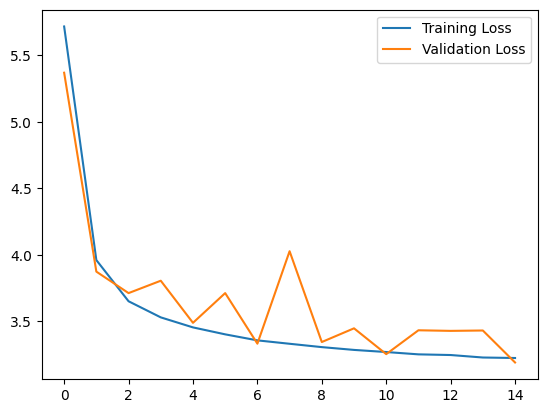

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0366 - loss: 1463.0292
Test accuracy: 0.04
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


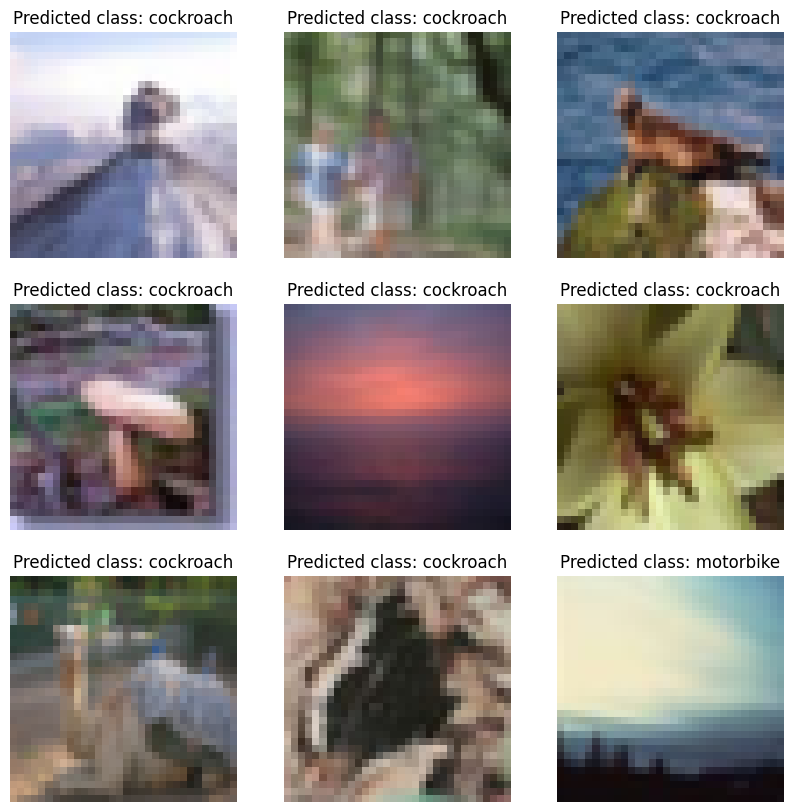

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Define class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'bicycle', 'bottles',
                'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cannon', 'castle', 'cattle',
                'church', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'frog', 'girl', 'hamster', 'house',
                'kangaroo', 'keyboard', 'lamp', 'lizard', 'lobster', 'man', 'maple_tree', 'motorbike',
                'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
                'pear', 'pickup_truck', 'pine_tree', 'plain', 'plates', 'puppy', 'rabbit', 'raccoon',
                'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'snake', 'spider', 'squirrel',
                'streetcar', 'sunflowers', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
                'willow_tree', 'wolf', 'woman', 'worm']

# Plot first 9 images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.set_title(f'{class_labels[y_train[i][0] % len(class_labels)]}')
    ax.axis('off')

plt.show()

# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)

# Custom CNN model with regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Use model for predictions
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Plot first 9 predicted images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i])
    ax.set_title(f'Predicted class: {class_labels[predicted_classes[i]]}')
    ax.axis('off')

plt.show()

#**CNN-LEARNING RATE SCHEDULING.**

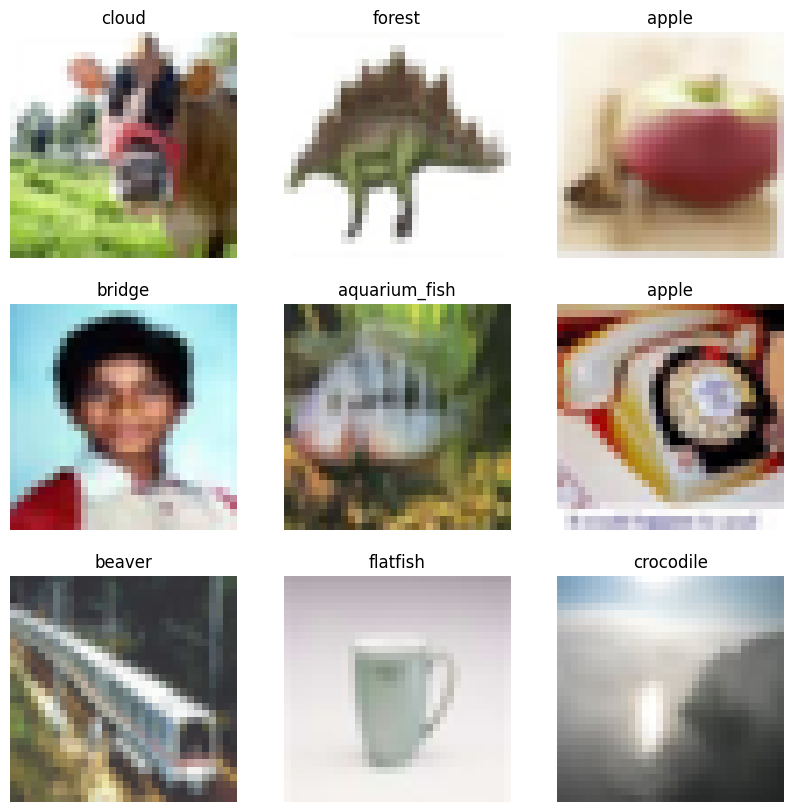

Epoch 1/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.0627 - loss: 7.3176 - val_accuracy: 0.0263 - val_loss: 5.5934 - learning_rate: 0.0100
Epoch 2/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.1560 - loss: 4.3539 - val_accuracy: 0.0982 - val_loss: 4.3113 - learning_rate: 0.0100
Epoch 3/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1997 - loss: 3.7568 - val_accuracy: 0.1068 - val_loss: 4.6304 - learning_rate: 0.0100
Epoch 4/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2235 - loss: 3.5638 - val_accuracy: 0.1514 - val_loss: 4.1395 - learning_rate: 0.0100
Epoch 5/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2458 - loss: 3.4776 - val_accuracy: 0.1965 - val_loss: 3.8233 - learning_rate: 0.0100
Epoch 6/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2582 - loss: 3.4201 - val_accuracy: 0.2003 - val_loss: 3.7399 - learning_rate: 0.0100
Epoch 7/75
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.2644 - 

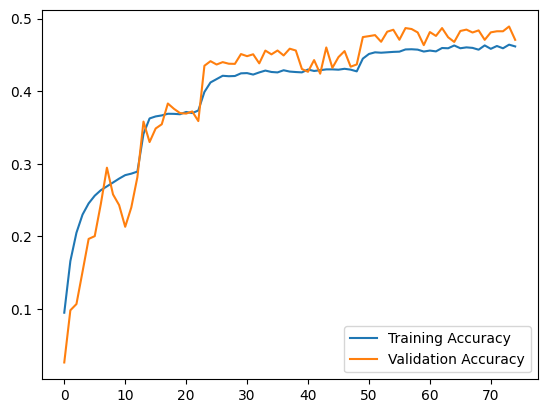

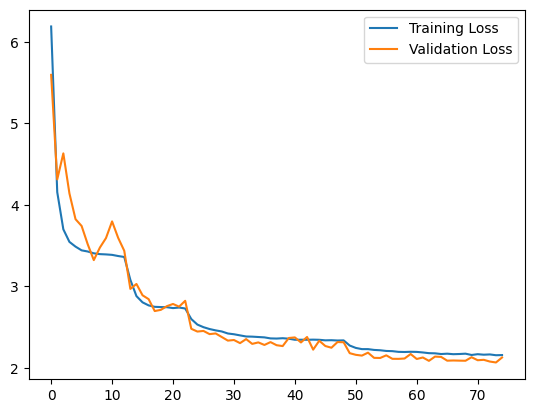

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0394 - loss: 880.6199
Test accuracy: 0.04
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


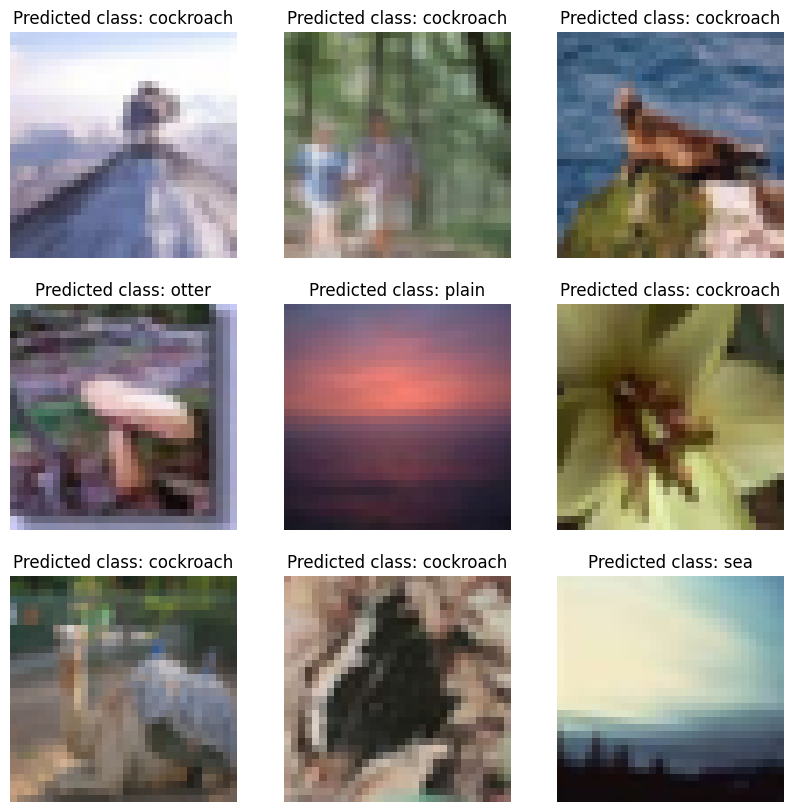

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Define class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'bicycle', 'bottles',
                'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cannon', 'castle', 'cattle',
                'church', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'frog', 'girl', 'hamster', 'house',
                'kangaroo', 'keyboard', 'lamp', 'lizard', 'lobster', 'man', 'maple_tree', 'motorbike',
                'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
                'pear', 'pickup_truck', 'pine_tree', 'plain', 'plates', 'puppy', 'rabbit', 'raccoon',
                'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'snake', 'spider', 'squirrel',
                'streetcar', 'sunflowers', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
                'willow_tree', 'wolf', 'woman', 'worm']


# Plot first 9 images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.set_title(f'{class_labels[y_train[i][0] % len(class_labels)]}')
    ax.axis('off')

plt.show()


# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)


# Custom CNN model with regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))


# Learning rate scheduling using SGD with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9, decay=0.0001)


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)


# Train model
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')


# Use model for predictions
predictions = model.predict(x_test)


# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Plot first 9 predicted images with labels
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i])
    ax.set_title(f'Predicted class: {class_labels[predicted_classes[i]]}')
    ax.axis('off')

plt.show()

#**CNN-ENSEMBLE LEARNING-COMBINE MULTIPLE MODELS.**

# Ensemble Methods Used:


1.  Model Averaging: Combines predictions from multiple models.
2.  Stacked Generalization: Trains a meta-model to make predictions based on predictions from multiple models.


# Benefits:


*   Improved accuracy
*   Reduced overfitting
*   Increased robustness


# Hyperparameter Tuning:


*   Model selection
*   Weighting scheme for model averaging
*   Meta-model architecture for stacked generalization


# Real-World Applications:


*   Image classification
*   Natural language processing
*   Recommendation systems


# Conclusion:


*   Ensemble methods can significantly improve model performance.
*   Choosing the right ensemble method and hyperparameters is crucial.
*   Experimentation and evaluation are essential for successful ensemble learning.



In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Average
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)


# Define model architectures
def model1(inputs):
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(100, activation='softmax')(x)
    return Model(inputs=inputs, outputs=outputs)


def model2(inputs):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))(inputs)
    x = Flatten()(base_model)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(100, activation='softmax')(x)
    return Model(inputs=inputs, outputs=outputs)


def model3(inputs):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))(inputs)
    x = Flatten()(base_model)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(100, activation='softmax')(x)
    return Model(inputs=inputs, outputs=outputs)


# Create individual models
input_shape = Input(shape=(32, 32, 3))
model1_instance = model1(input_shape)
model2_instance = model2(input_shape)
model3_instance = model3(input_shape)


# Compile models
model1_instance.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model2_instance.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model3_instance.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train models
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history1 = model1_instance.fit(train_generator, epochs=5, validation_data=test_generator, callbacks=[early_stopping, reduce_lr])
history2 = model2_instance.fit(train_generator, epochs=5, validation_data=test_generator, callbacks=[early_stopping, reduce_lr])
history3 = model3_instance.fit(train_generator, epochs=5, validation_data=test_generator, callbacks=[early_stopping, reduce_lr])


# Create ensemble model
def ensemble(models):
    inputs = Input(shape=(32, 32, 3))
    outputs = [model(inputs) for model in models]
    outputs = Average()(outputs)
    model = Model(inputs=inputs, outputs=outputs)
    return model


# Pass model instances, not model functions
ensemble_model = ensemble([model1_instance, model2_instance, model3_instance])

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 113ms/step - accuracy: 0.0989 - loss: 4.1005 - val_accuracy: 0.0407 - val_loss: 4.6893 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.2051 - loss: 3.2989 - val_accuracy: 0.2493 - val_loss: 3.0980 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2484 - loss: 3.0620 - val_accuracy: 0.2866 - val_loss: 2.9031 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2757 - loss: 2.9086 - val_accuracy: 0.2727 - val_loss: 2.9284 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.2936 - loss: 2.8350 - val_accuracy: 0.2570 - val_loss: 3.0611 - learning_rate: 0.0010
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 119ms/step - accuracy: 0.0164 - loss: 4.5748 - val_accuracy: 0.0190 - val_loss: 4.9479 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.0261 - loss: 4.2835 - v

Test accuracy: 0.00
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step


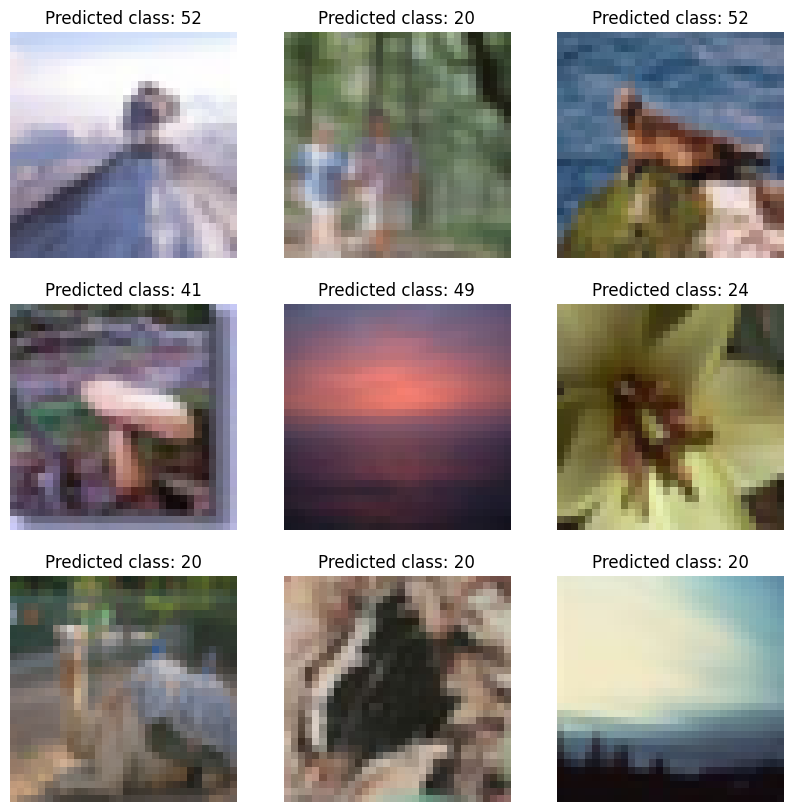

In [3]:
# Compile ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Evaluate ensemble model
# The evaluate method might return more than two values.
# Capture all returned values in a list.
evaluation_results = ensemble_model.evaluate(x_test, y_test, verbose=0)

# Access loss and accuracy from the list.
test_loss = evaluation_results[0]  # Loss is usually the first element.
test_acc = evaluation_results[1]  # Accuracy is usually the second element.

print(f'Test accuracy: {test_acc:.2f}')


# Use ensemble model for predictions
predictions = ensemble_model.predict(x_test)


# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Plot first 9 predicted images with labels
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i])
    ax.set_title(f'Predicted class: {predicted_classes[i]}')
    ax.axis('off')

plt.show()

#**CNN-HYPERMETER TUNING.**

In [2]:
!pip install git+https://github.com/keras-team/keras-tuner.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from keras_tuner import RandomSearch


# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


# Convert class labels to categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = data_gen.flow(x_train, y_train, batch_size=128)
test_generator = data_gen.flow(x_test, y_test, batch_size=128)


# Define hyperparameter space
hyperparameters = {
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [2, 3, 5],
    'conv_layers': [1, 2, 3],
    'dense_layers': [1, 2],
    'dropout_rate': [0.2, 0.5]
}


# Define model architecture
def model_builder(hp):
    model = Sequential()
    for i in range(hp.Int('conv_layers', 1, 3, default=2)):
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, default=0.3)))

    model.add(Flatten())
    for i in range(hp.Int('dense_layers', 1, 2, default=2)):
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, default=0.3)))

    model.add(Dense(100, activation='softmax'))

    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=hp.Float('learning_rate', 0.001, 0.1, default=0.01))
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=hp.Float('learning_rate', 0.001, 0.1, default=0.01))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Perform hyperparameter tuning
tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)


# Search for best hyperparameters
tuner.search(x=train_generator,
             epochs=10,
             validation_data=test_generator)


# Get best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)


# Train best model
best_model.fit(train_generator, epochs=10, validation_data=test_generator)


# Evaluate best model
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')






# Use best model for predictions
predictions = best_model.predict(x_test)


# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Plot first 9 predicted images with labels
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i])
    ax.set_title(f'Predicted class: {predicted_classes[i]}')
    ax.axis('off')

plt.show()


# Save predictions to file
with open('predictions.txt', 'w') as f:
    for i, class_name in enumerate(predicted_classes):
        f.write(f'Image {i+1}: {class_name}\n')


# Print best hyperparameters
print("Best hyperparameters: ")
print(best_hps)


# Print evaluation metrics
print("Evaluation metrics: ")
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


# Additional metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: ")
print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

print("Confusion Matrix: ")
print(confusion_matrix(np.argmax(y_test, axis=1), predicted_classes))

Trial 3 Complete [00h 19m 03s]
val_accuracy: 0.25

Best val_accuracy So Far: 0.25
Total elapsed time: 00h 57m 35s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
2                 |1                 |conv_layers
0.31036           |0.33396           |dropout_rate
1                 |1                 |dense_layers
adam              |sgd               |optimizer
0.089734          |0.046547          |learning_rate

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.0382 - loss: 4.6339 - val_accuracy: 0.0549 - val_loss: 4.6875
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.0651 - loss: 4.2477 - val_accuracy: 0.0301 - val_loss: 18.4786
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.0752 - loss: 4.2248 - val_accuracy: 0.0917 - val_loss: 5.8666
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.0853 - loss: 4.1254 - val_accuracy: 0.0349 - val_loss: 5.6477
Epoch 5/10
391/391 ━━━━━━━━━━━━